In [1]:
import os
import pandas as pd
import re
import chardet
import sqlalchemy
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.metrics import roc_auc_score, precision_score, classification_report, recall_score, ConfusionMatrixDisplay, precision_recall_fscore_support, confusion_matrix
from utils_mem import *
import mysql.connector
from mysql.connector import FieldType
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
import unidecode
from bs4 import BeautifulSoup
from mysql.connector.cursor import MySQLCursor
import sys
import requests
from IPython.display import clear_output
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold, LeaveOneGroupOut, StratifiedGroupKFold
import statistics 
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
target = "Braak"
path2save = "./graphs/"+target+"/"


In [3]:
import os
import pandas as pd

top_scores_algo = {}
for algo in ["RF", "SVM"]:
    path = "./backup_models/"+target+"/"+algo+"/"
    # Liste pour stocker les informations sur les top 5 scores
    top_scores = []

    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('score_on_cross_val.csv'):
                file_path = os.path.join(dirpath, filename)
                try:
                    df = pd.read_csv(file_path, index_col=0)

                    # Parcourir les colonnes numériques
                    for column in df.select_dtypes(include=['number']).columns:
                        for idx, value in df[column].items():
                            top_scores.append((value, file_path.replace("\\", "/"), column, idx))
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {file_path}: {e}")

    # Trier les scores et sélectionner les top 5
    top_scores.sort(reverse=True, key=lambda x: x[0])
    top_5_scores = top_scores[:5]

    # Afficher les résultats
    for score in top_5_scores:
        print(f"Score: {score[0]}, Fichier: {score[1]}, Colonne: {score[2]}, Index: {score[3]}")
    top_scores_algo[algo] = top_scores

Score: 0.829928549382716, Fichier: ./backup_models/Braak/RF/with_fs/T2/auc_roc/22-05-2024_09h39m03s/depth_score_on_cross_val.csv, Colonne: 10, Index: amy_3_segsouscort
Score: 0.8081545025417576, Fichier: ./backup_models/Braak/RF/with_fs/T0/auc_roc/21-05-2024_22h08m53s/depth_score_on_cross_val.csv, Colonne: 10, Index: amy_2_wmparc
Score: 0.7962079399661098, Fichier: ./backup_models/Braak/RF/with_fs/T4/auc_roc/21-05-2024_23h19m51s/depth_score_on_cross_val.csv, Colonne: 10, Index: amy_3_segsouscort
Score: 0.7925499273783588, Fichier: ./backup_models/Braak/RF/with_fs/T3/auc_roc/21-05-2024_23h11m16s/depth_score_on_cross_val.csv, Colonne: 100, Index: amy_3_segsouscort
Score: 0.7901263197586728, Fichier: ./backup_models/Braak/RF/without_fs/f1score/26-05-2024_11h28m31s/depth_score_on_cross_val.csv, Colonne: 10, Index: amy_2_wmparc
Score: 0.8069998034335063, Fichier: ./backup_models/Braak/SVM/with_fs/T4/auc_roc/21-05-2024_23h26m04s/depth_score_on_cross_val.csv, Colonne: sigmoid, Index: amy_3_se

In [4]:
import os
import pandas as pd
fs = [None, "T0", "T1", "T2", "T3", "T4"]

top_scores_algo = {}
for algo in ["RF", "SVM"]:
    if target == "preclinical":
        path = "./backup_models/preclinical/composite_ref_and_other_fs_before_normal/"+algo+"/"
    else:
        path = "./backup_models/Braak/"+algo+"/"
    # Liste pour stocker les informations sur les top 5 scores
    top_scores = []

    for nbr in fs:
        if nbr is None:
            p = path+"without_fs/f1score"
        else:
            p = path+"with_fs/"+nbr+"/f1score"
        if os.path.exists(p):
            
            dir_grid = max([datetime.strptime(f, "%d-%m-%Y_%Hh%Mm%Ss") for f in os.listdir(p) if 
                            os.path.isdir(p + '/' + f) and "27-05-2024" not in f]).strftime("%d-%m-%Y_%Hh%Mm%Ss")
            if os.path.exists(p+"/"+dir_grid+"/depth_score_on_cross_val.csv"):
                df = pd.read_csv(p+"/"+dir_grid+"/depth_score_on_cross_val.csv", index_col=0)

                # Parcourir les colonnes numériques
                for column in df.select_dtypes(include=['number']).columns:
                    for idx, value in df[column].items():
                        top_scores.append((value, p+"/"+dir_grid+"/depth_score_on_cross_val.csv", column, idx))
                        
            elif os.path.exists(p+"/"+dir_grid+"/kernel_score_on_cross_val.csv"):
                df = pd.read_csv(p+"/"+dir_grid+"/kernel_score_on_cross_val.csv", index_col=0)

                # Parcourir les colonnes numériques
                for column in df.select_dtypes(include=['number']).columns:
                    for idx, value in df[column].items():
                        top_scores.append((value, p+"/"+dir_grid+"/kernel_score_on_cross_val.csv", column, idx))

    # Trier les scores et sélectionner les top 5
    top_scores.sort(reverse=True, key=lambda x: x[0])
    top_5_scores = top_scores[:5]

    # Afficher les résultats
    for score in top_5_scores:
        print(f"Score: {score[0]}, Fichier: {score[1]}, Colonne: {score[2]}, Index: {score[3]}")
    top_scores_algo[algo] = top_scores

Score: 0.6576085936767051, Fichier: ./backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv, Colonne: 1000, Index: amy_2_wmparc
Score: 0.6564546392719767, Fichier: ./backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv, Colonne: 10, Index: amy_2_wmparc
Score: 0.6519986818256713, Fichier: ./backup_models/Braak/RF/with_fs/T1/f1score/26-05-2024_16h29m53s/depth_score_on_cross_val.csv, Colonne: 100, Index: amy_2_wmparc
Score: 0.6512256524713271, Fichier: ./backup_models/Braak/RF/with_fs/T1/f1score/26-05-2024_16h29m53s/depth_score_on_cross_val.csv, Colonne: 100, Index: amy_2_destrieux
Score: 0.6416431400405175, Fichier: ./backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv, Colonne: 10, Index: amy_3_ba_exvivo
Score: 0.6465772995021765, Fichier: ./backup_models/Braak/SVM/with_fs/T3/f1score/26-05-2024_17h14m35s/kernel_score_on_cross_val.csv, Colonne: rbf, Index: amy_3_segsouscor

# Graph 1: evolution perf avec fs

à changer avec braak: voir l'association strat ml + strat db avec la plus grande performance

amy_2_wmparc
1000
start
./backup_models/Braak/RF/without_fs/f1score
26-05-2024_13h57m25s


,10,100,1000
amy_2_ba_exvivo,0.530401,0.543557,0.627616
amy_2_destrieux,0.510955,0.547434,0.525610
amy_2_dkt,0.505694,0.567895,0.574148
amy_2_wmparc,0.512883,0.534457,0.554165
amy_2_segsouscort,0.577563,0.579019,0.564267
amy_2_desikan,0.558692,0.489600,0.498146
amy_3_ba_exvivo,0.501930,0.516864,0.545313
amy_3_destrieux,0.523106,0.530482,0.589634
amy_3_dkt,0.600965,0.554206,0.521104
amy_3_wmparc,0.556611,0.565697,0.510681


start
./backup_models/Braak/RF/with_fs/T0/f1score
26-05-2024_16h13m17s


,10,100,1000
amy_2_ba_exvivo,0.556714,0.570110,0.613432
amy_2_destrieux,0.563444,0.580763,0.489922
amy_2_dkt,0.594673,0.503135,0.566607
amy_2_wmparc,0.550093,0.568474,0.570340
amy_2_segsouscort,0.566182,0.563704,0.569098
amy_2_desikan,0.560009,0.542667,0.515884
amy_3_ba_exvivo,0.557545,0.571862,0.571161
amy_3_destrieux,0.578636,0.597199,0.577487
amy_3_dkt,0.537238,0.533423,0.629948
amy_3_wmparc,0.534286,0.632947,0.559295


start
./backup_models/Braak/RF/with_fs/T1/f1score
26-05-2024_16h29m53s


,10,100,1000
amy_2_ba_exvivo,0.569396,0.549139,0.552727
amy_2_destrieux,0.602578,0.651226,0.580521
amy_2_dkt,0.508589,0.511930,0.602796
amy_2_wmparc,0.617605,0.651999,0.633703
amy_2_segsouscort,0.618563,0.561278,0.595155
amy_2_desikan,0.561159,0.559290,0.565561
amy_3_ba_exvivo,0.554908,0.547843,0.546547
amy_3_destrieux,0.542011,0.509169,0.540572
amy_3_dkt,0.532452,0.536121,0.566048
amy_3_wmparc,0.614096,0.615888,0.624148


start
./backup_models/Braak/RF/with_fs/T2/f1score
26-05-2024_16h46m25s


,10,100,1000
amy_2_ba_exvivo,0.526236,0.603065,0.565072
amy_2_destrieux,0.555088,0.617687,0.521460
amy_2_dkt,0.575435,0.550104,0.590069
amy_2_wmparc,0.608945,0.578918,0.563522
amy_2_segsouscort,0.586281,0.584905,0.566592
amy_2_desikan,0.583750,0.568200,0.640050
amy_3_ba_exvivo,0.535843,0.619860,0.543257
amy_3_destrieux,0.588132,0.576910,0.563959
amy_3_dkt,0.576534,0.582640,0.641158
amy_3_wmparc,0.516633,0.611892,0.637029


start
./backup_models/Braak/RF/with_fs/T3/f1score
26-05-2024_17h02m32s


,10,100,1000
amy_2_ba_exvivo,0.562000,0.568421,0.540019
amy_2_destrieux,0.503380,0.558565,0.554387
amy_2_dkt,0.576753,0.528327,0.551645
amy_2_wmparc,0.573304,0.584709,0.584593
amy_2_segsouscort,0.574384,0.557942,0.565156
amy_2_desikan,0.547648,0.596708,0.553517
amy_3_ba_exvivo,0.594405,0.511326,0.597376
amy_3_destrieux,0.545388,0.576818,0.575799
amy_3_dkt,0.601009,0.602753,0.577286
amy_3_wmparc,0.624862,0.594504,0.616199


start
./backup_models/Braak/RF/with_fs/T4/f1score
26-05-2024_17h17m42s


,10,100,1000
amy_2_ba_exvivo,0.499758,0.562910,0.607461
amy_2_destrieux,0.565432,0.573921,0.579840
amy_2_dkt,0.590789,0.544099,0.557594
amy_2_wmparc,0.656455,0.590821,0.657609
amy_2_segsouscort,0.576588,0.534725,0.563114
amy_2_desikan,0.561593,0.522543,0.548228
amy_3_ba_exvivo,0.641643,0.610251,0.613573
amy_3_destrieux,0.553348,0.533774,0.539566
amy_3_dkt,0.553326,0.615506,0.562377
amy_3_wmparc,0.576235,0.590577,0.611600


amy_3_segsouscort
rbf
start
./backup_models/Braak/SVM/without_fs/f1score
26-05-2024_14h23m56s


,linear,rbf,poly,sigmoid
amy_2_ba_exvivo,0.524216,0.378850,0.486150,0.320681
amy_2_destrieux,0.480273,0.479128,0.514031,0.320681
amy_2_dkt,0.544411,0.560772,0.521142,0.320681
amy_2_wmparc,0.573386,0.585286,0.320681,0.564191
amy_2_segsouscort,0.582027,0.579368,0.600960,0.638491
amy_2_desikan,0.478480,0.453294,0.320681,0.320681
amy_3_ba_exvivo,0.523133,0.320681,0.320681,0.320681
amy_3_destrieux,0.493934,0.506357,0.535731,0.354976
amy_3_dkt,0.544414,0.492084,0.320681,0.320681
amy_3_wmparc,0.547864,0.560311,0.583019,0.581008


start
./backup_models/Braak/SVM/with_fs/T0/f1score
26-05-2024_16h27m02s


,linear,rbf,poly,sigmoid
amy_2_ba_exvivo,0.533248,0.320681,0.320681,0.320681
amy_2_destrieux,0.542107,0.487977,0.444813,0.320681
amy_2_dkt,0.526232,0.453294,0.440119,0.543263
amy_2_wmparc,0.593988,0.597852,0.320681,0.320681
amy_2_segsouscort,0.607581,0.616915,0.594215,0.527871
amy_2_desikan,0.469566,0.558586,0.507578,0.551348
amy_3_ba_exvivo,0.514501,0.344555,0.320681,0.320681
amy_3_destrieux,0.541864,0.460187,0.499578,0.320681
amy_3_dkt,0.527944,0.591511,0.515619,0.320681
amy_3_wmparc,0.565592,0.396202,0.320681,0.320681


start
./backup_models/Braak/SVM/with_fs/T1/f1score
26-05-2024_16h43m24s


,linear,rbf,poly,sigmoid
amy_2_ba_exvivo,0.558797,0.546167,0.320681,0.320681
amy_2_destrieux,0.519847,0.512863,0.479627,0.320681
amy_2_dkt,0.534723,0.520125,0.320681,0.320681
amy_2_wmparc,0.556110,0.403268,0.320681,0.320681
amy_2_segsouscort,0.621872,0.630461,0.320681,0.559524
amy_2_desikan,0.520038,0.445858,0.320681,0.530480
amy_3_ba_exvivo,0.536013,0.546167,0.320681,0.403241
amy_3_destrieux,0.520272,0.522519,0.498294,0.547741
amy_3_dkt,0.549152,0.520125,0.346360,0.320681
amy_3_wmparc,0.555283,0.601783,0.320681,0.320681


start
./backup_models/Braak/SVM/with_fs/T2/f1score
26-05-2024_16h59m30s


,linear,rbf,poly,sigmoid
amy_2_ba_exvivo,0.556191,0.579976,0.467574,0.524935
amy_2_destrieux,0.528309,0.320681,0.320681,0.343865
amy_2_dkt,0.546043,0.532291,0.320681,0.320681
amy_2_wmparc,0.623390,0.587790,0.320681,0.320681
amy_2_segsouscort,0.555494,0.633291,0.320681,0.482825
amy_2_desikan,0.535302,0.523333,0.320681,0.320681
amy_3_ba_exvivo,0.505372,0.344555,0.320681,0.320681
amy_3_destrieux,0.537579,0.564876,0.320681,0.343865
amy_3_dkt,0.536583,0.595547,0.320681,0.560554
amy_3_wmparc,0.634288,0.412272,0.320681,0.320681


start
./backup_models/Braak/SVM/with_fs/T3/f1score
26-05-2024_17h14m35s


,linear,rbf,poly,sigmoid
amy_2_ba_exvivo,0.529449,0.566146,0.320681,0.320681
amy_2_destrieux,0.488139,0.490534,0.402327,0.320681
amy_2_dkt,0.509452,0.641374,0.320681,0.320681
amy_2_wmparc,0.527805,0.584624,0.320681,0.320681
amy_2_segsouscort,0.525454,0.634735,0.571820,0.547140
amy_2_desikan,0.498036,0.535346,0.320681,0.320681
amy_3_ba_exvivo,0.542338,0.547522,0.320681,0.320681
amy_3_destrieux,0.507069,0.546090,0.320681,0.320681
amy_3_dkt,0.502131,0.640434,0.320681,0.320681
amy_3_wmparc,0.584338,0.552551,0.568829,0.320681


start
./backup_models/Braak/SVM/with_fs/T4/f1score
26-05-2024_17h29m02s


,linear,rbf,poly,sigmoid
amy_2_ba_exvivo,0.605837,0.320681,0.465061,0.320681
amy_2_destrieux,0.503068,0.570370,0.320681,0.320681
amy_2_dkt,0.531439,0.590374,0.320681,0.320681
amy_2_wmparc,0.621955,0.543078,0.624890,0.591684
amy_2_segsouscort,0.605595,0.605889,0.492968,0.574812
amy_2_desikan,0.556640,0.608924,0.320681,0.593290
amy_3_ba_exvivo,0.643865,0.320681,0.320681,0.516270
amy_3_destrieux,0.496024,0.589795,0.320681,0.563839
amy_3_dkt,0.598041,0.343865,0.320681,0.320681
amy_3_wmparc,0.581233,0.543078,0.320681,0.598896


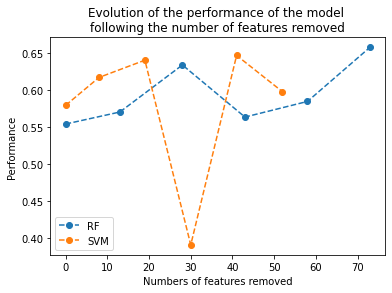

In [9]:
paths = [["./backup_models/"+target+"/composite_ref_and_other_fs_before_normal/RF/", 
          ["irm2_under_APOE_one_hot", "1000"]], 
         ["./backup_models/"+target+"/composite_ref_and_other_fs_before_normal/SVM/", 
          ["irm1_both_APOE_nbr_allelle_4", "sigmoid"]]]
fs = [None, "300", "250", "200", "150"]

for algo in top_scores_algo:
    top1 = top_scores_algo[algo][0]
    
    score = top1[0]
    ml_param = top1[2]
    db_param = top1[3]
    print(db_param)
    print(ml_param)
    pathing = "./backup_models/Braak/"+algo+"/"
    k = "depth" if algo == "RF" else "kernel"
    
    perf = {}
    base_nbr = -1
    for nbr in [None, 0,1,2,3,4]:
        if nbr is None:
            p = pathing+"without_fs/f1score"
        else:
            p = pathing+"with_fs/T"+str(nbr)+"/f1score"
        print("start")
        print(p)
        if os.path.exists(p):
            dir_grid = max([datetime.strptime(f, "%d-%m-%Y_%Hh%Mm%Ss") for f in os.listdir(p) if 
                            os.path.isdir(p + '/' + f) and "27-05-2024" not in f]).strftime("%d-%m-%Y_%Hh%Mm%Ss")
            print(dir_grid)
            if os.path.exists(p+"/"+dir_grid+"/"+k+"_score_on_cross_val.csv"):
                df = pd.read_csv(p+"/"+dir_grid+"/"+k+"_score_on_cross_val.csv", index_col=0)
                display(df)
                df_dataset  = pd.read_csv(p+"/"+dir_grid+"/dataset/"+db_param+".csv", index_col=0)
                df_dataset.drop(columns={"id_patient", "diagnostic"}, inplace=True)
                if base_nbr == -1:
                    base_nbr = len(df_dataset.columns)
                
                    perf[0] = df.at[db_param, ml_param]
                else:
                    perf[base_nbr - int(len(df_dataset.columns))] = df.at[db_param, ml_param]
                
    plt.plot(list(perf.keys()), list(perf.values()), marker="o", linestyle='dashed', label=algo)
    
plt.xlabel("Numbers of features removed")
plt.ylabel("Performance")
plt.title("Evolution of the performance of the model \nfollowing the number of features removed")
plt.legend()
plt.savefig(path2save+"graph_1_fs_evolution"+target+".pdf", bbox_inches = 'tight')
plt.show()

# Graph 2: FPI and SHAP on best score ever 

  0%|          | 0/18 [00:00<?, ?it/s]

saving SHAP in ./graphs/Braak/RF_T4_1000_amy_2_wmparc


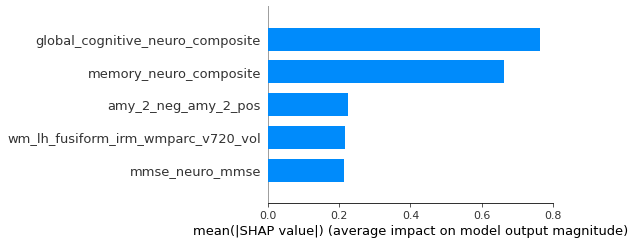

saving feature permutation in ./graphs/Braak/RF_T4_1000_amy_2_wmparc


<Figure size 432x288 with 0 Axes>

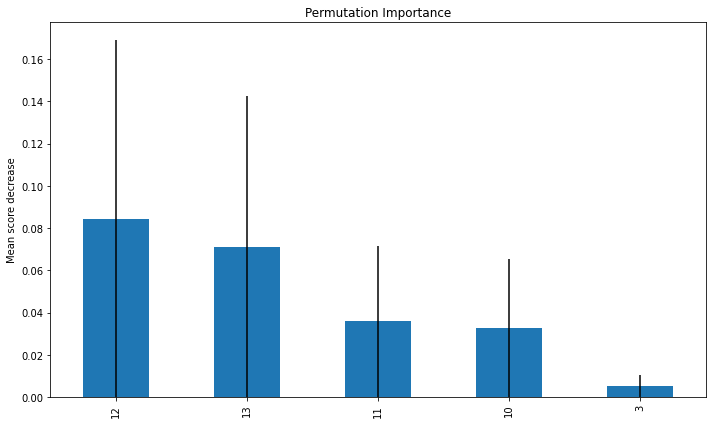

c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Top 5 features selon SHAP:
                                              Feature  SHAP Importance
4                    global_cognitive_neuro_composite           0.7627
1                              memory_neuro_composite           0.6626
15                                amy_2_neg_amy_2_pos           0.2252
10                 wm_lh_fusiform_irm_wmparc_v720_vol           0.2176
6                                     mmse_neuro_mmse           0.2130
12                 wm_rh_fusiform_irm_wmparc_v720_vol           0.2106
5                   score_neuro_luria_z_neuro_luria_z           0.2058
11               wm_rh_entorhinal_irm_wmparc_v720_vol           0.1511
13         wm_rh_inferiortemporal_irm_wmparc_v720_vol           0.1511
2                           executive_neuro_composite           0.1459
3                        visuospatial_neuro_composite           0.1394
0                 copy_neuro_clock_copy_neuro_clock_z           0.0947
14           wm_rh_middletemporal_irm_wmparc_v720_

  0%|          | 0/29 [00:00<?, ?it/s]

saving SHAP in ./graphs/Braak/SVM_T3_rbf_amy_3_segsouscort


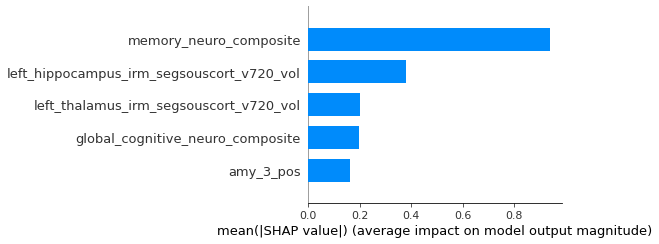

saving feature permutation in ./graphs/Braak/SVM_T3_rbf_amy_3_segsouscort


<Figure size 432x288 with 0 Axes>

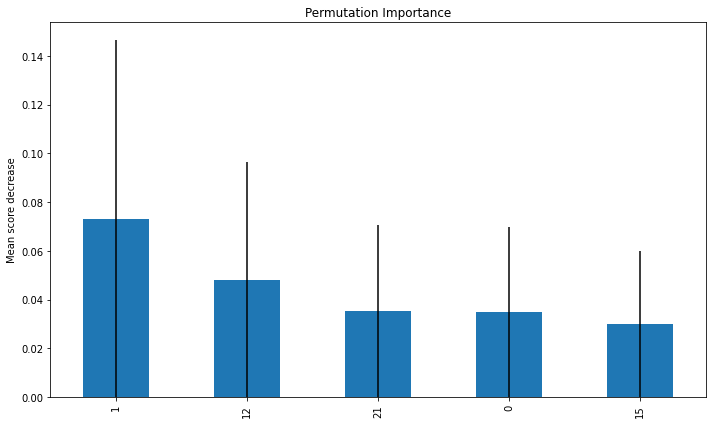

c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Top 5 features selon SHAP:
                                              Feature  SHAP Importance
1                              memory_neuro_composite           0.9380
12          left_hippocampus_irm_segsouscort_v720_vol           0.3810
11             left_thalamus_irm_segsouscort_v720_vol           0.2029
4                    global_cognitive_neuro_composite           0.1989
21                                          amy_3_pos           0.1629
15  left_cerebellum_cortex_irm_segsouscort_v720_vo...           0.1491
13             left_amygdala_irm_segsouscort_v720_vol           0.1328
16            right_thalamus_irm_segsouscort_v720_vol           0.1266
19           right_ventraldc_irm_segsouscort_v720_vol           0.1239
7                                     mmse_neuro_mmse           0.1150
5       animals_neuro_fluency_animals_neuro_fluency_z           0.1112
6                   score_neuro_luria_z_neuro_luria_z           0.1029
9   tmt_b_a_time_neuro_trail_making_test_z_tmt_b_a

<Figure size 432x288 with 0 Axes>

In [5]:
def top_features(model, X, y, path, n=5):
    # SHAP
    explainer = shap.KernelExplainer(model.predict, X)
    shap_values = explainer(X)
    
    shap.summary_plot(shap_values, X, plot_type="bar", max_display=n, show=False)
    print("saving SHAP in " + path)
    plt.savefig(path + "_shap_plot.png")
    shap.summary_plot(shap_values, X, plot_type="bar", max_display=n, show=True)
    plt.clf()
    
    shap_importance = np.abs(shap_values.values).mean(axis=0)
    shap_feature_importance = pd.DataFrame({'Feature': X.columns, 'SHAP Importance': shap_importance})
    shap_feature_importance = shap_feature_importance.sort_values(by='SHAP Importance', ascending=False)
    
    #shap.decision_plot(explainer.expected_value, shap_values.values, X_test, feature_names=X_test.columns)
    
    # Feature permutation importance
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=0, scoring="f1_weighted")
    perm_importance_mean = np.mean(perm_importance.importances, axis=1)
    perm_feature_importance = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': perm_importance_mean, 'std': perm_importance_mean})
    perm_feature_importance = perm_feature_importance.sort_values(by='Permutation Importance', ascending=False)
    
    
    fig, ax = plt.subplots(figsize=(10, 6))

    perm_feature_importance.head(n)["Permutation Importance"].plot.bar(yerr=perm_feature_importance.head(n)["std"], ax=ax)
    ax.set_title("Permutation Importance")
    ax.set_ylabel("Mean score decrease")
    fig.tight_layout()
    print("saving feature permutation in " + path)
    plt.savefig(path + "_feature_permutation_plot.png")
    plt.show()
    plt.clf()
    
    # ANOVA F-test
    selector = SelectKBest(score_func=f_classif, k=n)
    X_selected = selector.fit_transform(X, y)
    anova_scores = selector.scores_
    anova_feature_importance = pd.DataFrame({'Feature': X.columns, 'ANOVA F-test Score': anova_scores, "pvalues": selector.pvalues_})
    anova_feature_importance = anova_feature_importance.sort_values(by='ANOVA F-test Score', ascending=False)
    
    anova_feature_importance[["ANOVA F-test Score"]] = anova_feature_importance[["ANOVA F-test Score"]].round(4)
    return shap_feature_importance.round(4), perm_feature_importance.round(4), anova_feature_importance


for algo in top_scores_algo:
    top1 = top_scores_algo[algo][0]
    
    score = top1[0]
    path_file = top1[1]
    ml_param = top1[2]
    db_param = top1[3]
    p = "/".join(path_file.split("/")[:-1])
    k = "depth" if algo == "RF" else "kernel"
    
    if os.path.exists(p):
        
        df_test  = pd.read_csv(p+"/test_train_set/"+k+"_"+ml_param+"_"+db_param+"_score_f1score_test_set.csv", index_col=0)
        g  = pd.read_csv(p+"/dataset/"+db_param+".csv", index_col=0)
        g = g[["id_patient"]]
        g = df_test.merge(g, how='left', left_index=True, right_index=True)["id_patient"]
        y_test = df_test[["y"]].rename(columns={"y": "diagnostic"})
        X_test = df_test.drop(columns=["y"])
        with open(p+"/gridsearch_models/"+k+"_"+ml_param+"_"+db_param+"_score_f1score.pickle", 'rb') as f:
            grid = pickle.load(f)
             
        shap_features, perm_features, anova_features = top_features(grid.best_estimator_, X_test, y_test, 
                                                                    path2save+algo+"_"+p.split("/")[-3]+"_"+ml_param+"_"+db_param, n=5)
            
        shap_features.to_csv("./graphs/Braak/"+algo+"_"+p.split("/")[-3]+"_"+ml_param+"_"+db_param+"_shap.csv", sep=";")
        perm_features.to_csv("./graphs/Braak/"+algo+"_"+p.split("/")[-3]+"_"+ml_param+"_"+db_param+"_perm_feature.csv", sep=";")
        anova_features.to_csv("./graphs/Braak/"+algo+"_"+p.split("/")[-3]+"_"+ml_param+"_"+db_param+"_anova.csv", sep=";")
        print("Top 5 features selon SHAP:")
        print(shap_features)
        print("\nTop 5 features selon Permutation Importance:")
        print(perm_features)
        print("\nTop 5 features selon ANOVA F-test:")
        print(anova_features)

# Repeated XAI techniques

In [17]:
def top_features(model, X, y, path, n=5):
    # SHAP
    explainer = shap.KernelExplainer(model.predict, X)
    shap_values = explainer(X)
    
    shap_importance = np.abs(shap_values.values).mean(axis=0)
    shap_feature_importance = pd.DataFrame({'Feature': X.columns, 'SHAP Importance': shap_importance})
    shap_feature_importance = shap_feature_importance.sort_values(by='SHAP Importance', ascending=False).head(n)
    
    # Feature permutation importance
    perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=0, scoring="f1_weighted")
    perm_importance_mean = np.mean(perm_importance.importances, axis=1)
    perm_feature_importance = pd.DataFrame({'Feature': X.columns, 'Permutation Importance': perm_importance_mean, 'std': perm_importance_mean})
    perm_feature_importance = perm_feature_importance.sort_values(by='Permutation Importance', ascending=False).head(n)
    
    return shap_feature_importance.round(4), perm_feature_importance.round(4)


for algo in top_scores_algo:
    top1 = top_scores_algo[algo][0]
    
    score = top1[0]
    path_file = top1[1]
    ml_param = top1[2]
    db_param = top1[3]
    p = "/".join(path_file.split("/")[:-1])
    k = "depth" if algo == "RF" else "kernel"
    
    if os.path.exists(p):
        
        df  = pd.read_csv(p+"/dataset/"+db_param+".csv", index_col=0)
        df.reset_index(drop=True, inplace=True)
        g = df[["id_patient"]]
        y = df["diagnostic"]
        X = df.drop(columns=["diagnostic", "id_patient"])
        with open(p+"/gridsearch_models/"+k+"_"+ml_param+"_"+db_param+"_score_f1score.pickle", 'rb') as f:
            grid = pickle.load(f)
        model = grid.best_estimator_
        cv = StratifiedGroupKFold(5)
        feat_shap = {}
        feat_perm = dict()
        
        for ind, (train_index, test_index) in enumerate(cv.split(X, y, g)):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            
            shap_features, perm_features = top_features(model, X_test, y_test,
                                                        path2save+algo+"_"+p.split("/")[-3]+"_"+ml_param+"_"+db_param, n=5)
            
            for features in shap_features["Feature"]:
                if features not in feat_shap:
                    feat_shap[features] = 0
                feat_shap[features] += 1

            for features in perm_features["Feature"]:
                if features not in feat_perm:
                    feat_perm[features] = 0
                feat_perm[features] += 1
                
        print("\n\nfeat for SHAP: \n")
        for head in sorted(feat_shap.items(), key=lambda x:x[1], reverse=True):
            print(head[0]+" -> "+str(head[1]))
        
        print("\n\nfeat for PERM: \n")
        for head in sorted(feat_perm.items(), key=lambda x:x[1], reverse=True):
            print(head[0]+" -> "+str(head[1]))

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]



feat for SHAP: 

memory_neuro_composite -> 5
global_cognitive_neuro_composite -> 5
executive_neuro_composite -> 4
wm_rh_entorhinal_irm_wmparc_v720_vol -> 4
score_neuro_luria_z_neuro_luria_z -> 2
wm_rh_inferiortemporal_irm_wmparc_v720_vol -> 2
wm_lh_fusiform_irm_wmparc_v720_vol -> 1
mmse_neuro_mmse -> 1
copy_neuro_clock_copy_neuro_clock_z -> 1


feat for PERM: 

wm_rh_entorhinal_irm_wmparc_v720_vol -> 5
global_cognitive_neuro_composite -> 4
wm_rh_fusiform_irm_wmparc_v720_vol -> 3
score_neuro_luria_z_neuro_luria_z -> 3
visuospatial_neuro_composite -> 2
wm_rh_inferiortemporal_irm_wmparc_v720_vol -> 1
wm_lh_fusiform_irm_wmparc_v720_vol -> 1
tmt_b_a_time_neuro_trail_making_test_z_tmt_b_a_time_neuro_trail_making_test_z -> 1
tmt_b_errors_neuro_trail_making_test_tmt_b_a_errors_neuro_trail_making_test -> 1
memory_neuro_composite -> 1
wm_rh_middletemporal_irm_wmparc_v720_vol -> 1
executive_neuro_composite -> 1
z_tmt_b_a_errors_neuro_trail_making_test_z -> 1


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]



feat for SHAP: 

memory_neuro_composite -> 5
score_neuro_luria_z_neuro_luria_z -> 4
right_ventraldc_irm_segsouscort_v720_vol -> 3
mmse_neuro_mmse -> 2
executive_neuro_composite -> 2
left_hippocampus_irm_segsouscort_v720_vol -> 2
left_thalamus_irm_segsouscort_v720_vol -> 1
left_cerebellum_cortex_irm_segsouscort_v720_vol_right_cerebellum_cortex_irm_segsouscort_v720_vol -> 1
global_cognitive_neuro_composite -> 1
left_amygdala_irm_segsouscort_v720_vol -> 1
copy_neuro_clock_copy_neuro_clock_z -> 1
right_amygdala_irm_segsouscort_v720_vol -> 1
amy_3_neg -> 1


feat for PERM: 

memory_neuro_composite -> 5
score_neuro_luria_z_neuro_luria_z -> 3
left_thalamus_irm_segsouscort_v720_vol -> 2
left_hippocampus_irm_segsouscort_v720_vol -> 2
visuospatial_neuro_composite -> 2
left_cerebellum_cortex_irm_segsouscort_v720_vol_right_cerebellum_cortex_irm_segsouscort_v720_vol -> 2
right_hippocampus_irm_segsouscort_v720_vol -> 1
animals_neuro_fluency_animals_neuro_fluency_z -> 1
executive_neuro_composite ->

# Graph 4: Confusion matrix des 3 bests  et ROC CURVE
ATTENTION: changer le threshold pour auc roc score

0.871969392235994
[[0. 1. 1.]
 [0. 1. 1.]
 [0. 1. 1.]
 [0. 1. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]
 [1. 1. 0.]
 [0. 1. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [0. 1. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 1.]
 [0. 1. 1.]
 [1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 1. 0.]
 [1. 1. 0.]
 [0. 1. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 1. 0.

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

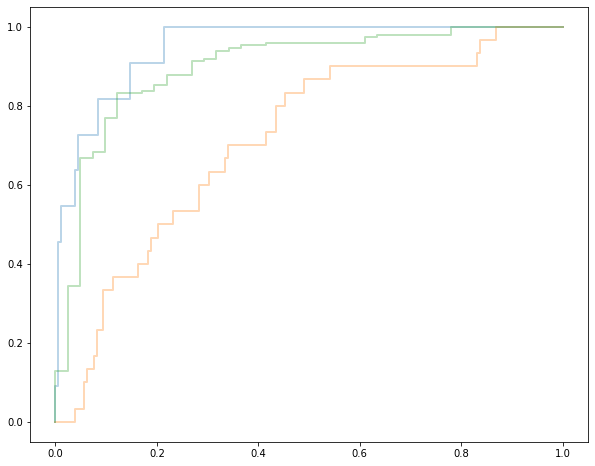

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

def plot_roc_and_confusion_matrix(model, X, y, groups, n_classes, n_splits=5):
    y_bin = label_binarize(y, classes=np.arange(n_classes))

    # Préparer la validation croisée
    sgkf = StratifiedGroupKFold(n_splits=n_splits)
    
    # Initialiser les variables pour les courbes ROC et les matrices de confusion
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    confusion_matrices = np.zeros((n_classes, n_classes))

    plt.figure(figsize=(10, 8))

    for train_index, test_index in sgkf.split(X, y, groups):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_bin[train_index], y_bin[test_index]
        
        # Standardiser les caractéristiques
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Entraîner le modèle OVR avec le modèle spécifié
        classifier = OneVsRestClassifier(model)
        classifier.fit(X_train, y_train)
        
        # Obtenir les scores de probabilité pour chaque classe
        y_score = classifier.decision_function(X_test)
        print(roc_auc_score(y_test, y_score, multi_class="ovo", average="weighted", labels=labels))
        
        # Calculer les courbes ROC pour chaque classe et déterminer les seuils optimaux
        fpr = dict()
        tpr = dict()
        thresholds = dict()
        roc_auc = dict()
        optimal_thresholds = []

        for i in range(n_classes):
            fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
            # Interpoler les tpr à la moyenne des fpr
            tprs.append(np.interp(mean_fpr, fpr[i], tpr[i]))
            tprs[-1][0] = 0.0
            
            # Calculer le point optimal pour chaque classe en utilisant Youden's J statistic
            optimal_idx = np.argmax(tpr[i] - fpr[i])
            optimal_threshold = thresholds[i][optimal_idx]
            optimal_thresholds.append(optimal_threshold)
            
            # Tracer les courbes ROC
            plt.plot(fpr[i], tpr[i], lw=2, alpha=0.3,
                     label='ROC fold {0} class {1} (area = {2:0.2f})'
                           ''.format(len(tprs) // n_classes, i, roc_auc[i]))

        # Faire des prédictions en utilisant les seuils optimaux
        y_pred_adjusted = np.zeros_like(y_score)
        
        for i in range(n_classes):
            y_pred_adjusted[:, i] = (y_score[:, i] >= optimal_thresholds[i]).astype(int)
        
        # Convertir les prédictions binaires en étiquettes multiclasses
        print(y_pred_adjusted)
        y_pred_labels = np.argmax(y_pred_adjusted, axis=1)
        print(y_pred_labels)
        y_test_labels = np.argmax(y_test, axis=1)
        
        # Accumuler les matrices de confusion
        confusion_matrices += confusion_matrix(y.iloc[test_index], np.argmax(classifier.predict(X_test), axis=1))

    # Tracer la moyenne des courbes ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='b', linestyle='-', linewidth=2,
             label='Mean ROC (area = {0:0.2f})'.format(mean_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for each class')
    plt.legend(loc="lower right")
    plt.show()

    # Afficher la matrice de confusion moyenne
    print("Matrice de confusion cumulée:\n", confusion_matrices)

# Exemple d'utilisation
X, y = make_classification(n_samples=1000, n_classes=3, weights=[0.05, 0.15, 0.8], n_informative=3, random_state=42)
groups = np.random.randint(0, 50, size=1000)  # Simuler des groupes pour chaque échantillon
model = SVC(kernel='linear', probability=True, random_state=42)
plot_roc_and_confusion_matrix(model, X, y, groups, n_classes=3)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

def plot_roc_and_confusion_matrix(model, X, y, groups, name_file=None, labels=None, n_splits=5):
    # Convertir y en une matrice binaire
    y_bin = label_binarize(y, classes=np.unique(y))

    # Préparer la validation croisée
    sgkf = StratifiedGroupKFold(n_splits=n_splits)
    
    # Initialiser les variables pour les courbes ROC et les matrices de confusion
    tprs = {i: [] for i in range(len(np.unique(y)))}
    mean_fpr = np.linspace(0, 1, 100)
    confusion_matrices = []
    class_weights = compute_class_weight(class_weight='balanced', classes=np.array(labels), y=y)
    class_weight_dict = {i: class_weights[i] for i in range(len(np.unique(y)))}

    plt.figure(figsize=(10, 8))

    for train_index, test_index in sgkf.split(X, y, groups):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_bin[train_index], y_bin[test_index]
        
        
        # Entraîner le modèle OVR avec le modèle spécifié
        #model.set_params({"class_weight": class_weight_dict})
        classifier = OneVsRestClassifier(model)
        classifier.fit(X_train, y_train)
        model.fit(X_train, y.iloc[train_index])
        
        # Vérifier si le modèle a la méthode `decision_function`, sinon utiliser `predict_proba`
        if hasattr(classifier, "decision_function"):
            y_score = classifier.decision_function(X_test)
        else:
            y_score = classifier.predict_proba(X_test)
        
        # Calculer les courbes ROC pour chaque classe et déterminer les seuils optimaux
        fpr = dict()
        tpr = dict()
        thresholds = dict()
        roc_auc = dict()
        optimal_thresholds = []

        for i, lab in zip(range(len(np.unique(y))), labels):
            fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], y_score[:, i], )
            roc_auc[i] = auc(fpr[i], tpr[i])
            
            # Interpoler les tpr à la moyenne des fpr
            tprs[i].append(np.interp(mean_fpr, fpr[i], tpr[i]))
            tprs[i][-1][0] = 0.0
            
            # Calculer le point optimal pour chaque classe en utilisant Youden's J statistic
            optimal_idx = np.argmax(tpr[i] - fpr[i])
            optimal_threshold = thresholds[i][optimal_idx]
            optimal_thresholds.append(optimal_threshold)
            
            # Tracer les courbes ROC pour chaque pli
            plt.plot(fpr[i], tpr[i], lw=2, alpha=0.3,
                     label='ROC fold {0} class {1} (area = {2:0.2f})'
                           ''.format(len(tprs[i]), lab, roc_auc[i]))

        # Faire des prédictions en utilisant les seuils optimaux
        y_pred_adjusted = np.zeros_like(y_score)
        
        for i in range(len(np.unique(y))):
            y_pred_adjusted[:, i] = (y_score[:, i] >= optimal_thresholds[i]).astype(int)* (y_score[:, i])
            """print(y_score[:, i])
            print(optimal_thresholds[i])
            print((y_score[:, i] >= optimal_thresholds[i]).astype(int))
            print((y_score[:, i] >= optimal_thresholds[i]).astype(int) * (y_score[:, i]))
            sys.exit()"""
        # Convertir les prédictions binaires en étiquettes multiclasses
        y_pred_labels = np.argmax(y_pred_adjusted, axis=1)
        y_pred_labels[y_pred_labels==3] = 5
        y_pred_labels[y_pred_labels==2] = 3
        y_test_labels = y[test_index]  # Utiliser les classes originales
        cm = confusion_matrix(y.iloc[test_index], model.predict(X_test), labels=[0,1,3,5])
        
        # Accumuler les matrices de confusion
        confusion_matrices.append(cm)

    # Tracer la moyenne des courbes ROC pour chaque classe
    for i, lab in zip(range(len(np.unique(y))), labels):
        mean_tpr = np.mean(tprs[i], axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.plot(mean_fpr, mean_tpr, linestyle='-', linewidth=2,
                 label='Mean ROC class {0} (area = {1:0.2f})'.format(lab, mean_auc))

    # Calculer la courbe ROC moyenne globale
    all_tprs = np.mean([np.mean(tprs[i], axis=0) for i in range(len(np.unique(y)))], axis=0)
    all_auc = auc(mean_fpr, all_tprs)
    plt.plot(mean_fpr, all_tprs, color='b', linestyle='-', linewidth=2,
             label='Mean ROC all classes (area = {0:0.2f})'.format(all_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    if name_file is not None:
        plt.savefig("./graphs/Braak/"+name_file+"_roc.png")
    plt.show()

    # Afficher la matrice de confusion moyenne
    print("Matrice de confusion cumulée:\n", sum(confusion_matrices))
    return confusion_matrices

# Exemple d'utilisation
X, y = make_classification(n_samples=1000, n_classes=3, weights=[0.05, 0.15, 0.8], n_informative=3, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
groups = np.random.randint(0, 50, size=1000)  # Simuler des groupes pour chaque échantillon
model = RandomForestClassifier(random_state=42)  # Exemple avec RandomForestClassifier
#plot_roc_and_confusion_matrix(model, X, y, groups, n_splits=5)


(0.6636258781587501, './backup_models/Braak/RF/with_fs/T1/f1score/22-05-2024_20h45m30s/depth_score_on_cross_val.csv', '10', 'amy_2_wmparc')
./backup_models/Braak/RF/with_fs/T1/f1score/22-05-2024_20h45m30s/depth_score_on_cross_val.csv


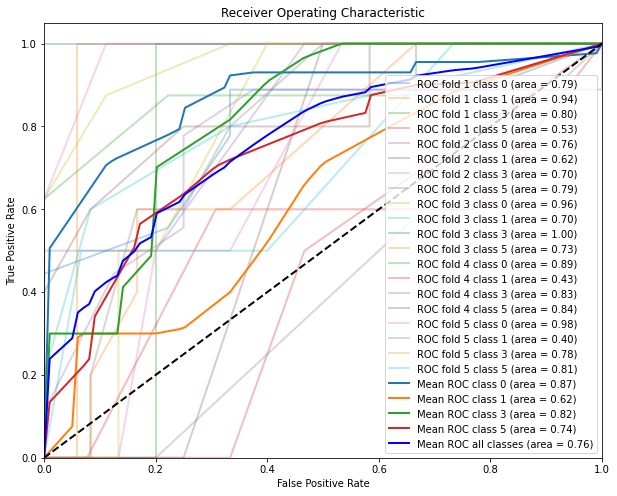

Matrice de confusion cumulée:
 [[36  0  1  5]
 [ 6  0  0  2]
 [ 2  0  4  5]
 [ 8  1  5 11]]
[[36  0  1  5]
 [ 6  0  0  2]
 [ 2  0  4  5]
 [ 8  1  5 11]]


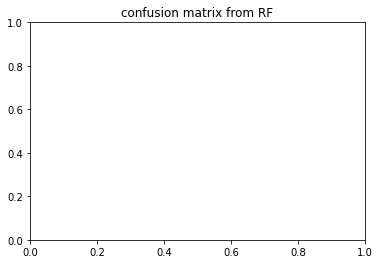

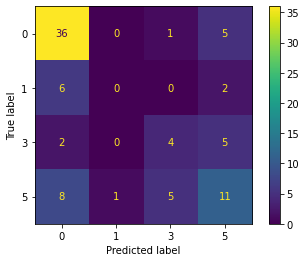

(0.6351268760305622, './backup_models/Braak/SVM/with_fs/T2/f1score/22-05-2024_21h02m21s/depth_score_on_cross_val.csv', 'linear', 'amy_2_wmparc')
./backup_models/Braak/SVM/with_fs/T2/f1score/22-05-2024_21h02m21s/depth_score_on_cross_val.csv


<Figure size 432x288 with 0 Axes>

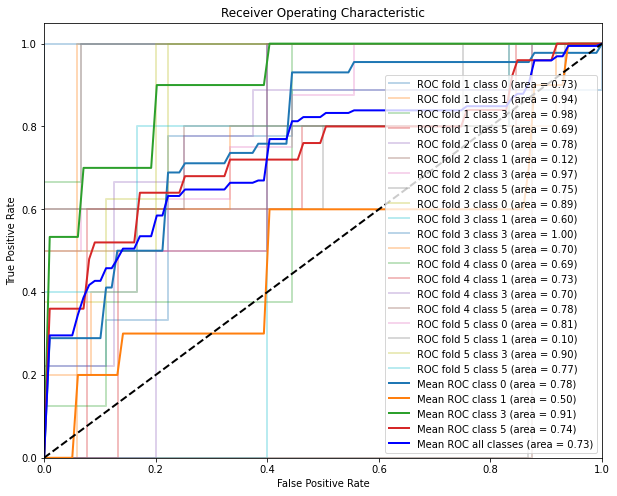

Matrice de confusion cumulée:
 [[32  3  2  5]
 [ 3  1  0  4]
 [ 1  2  4  4]
 [ 7  1  3 14]]
[[32  3  2  5]
 [ 3  1  0  4]
 [ 1  2  4  4]
 [ 7  1  3 14]]


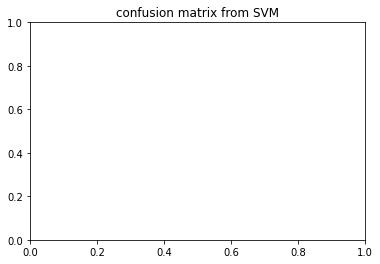

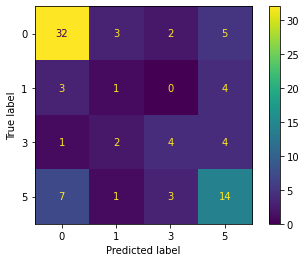

<Figure size 432x288 with 0 Axes>

In [10]:
if target == "Braak":
    index = "id_patient"
else:
    index = "RID"
    
summat = True
for algo in top_scores_algo:
    top_scores = top_scores_algo[algo]
    k = "depth" if algo =="RF" else "kernel"
    
    for i in range(1):
        print(top_scores[i])
        filename = top_scores[i][1]
        print(filename)
        path = "/".join(filename.split("/")[:-1])
        strat_db = top_scores[i][3]
        k_val = top_scores[i][2]
        best_scores=top_scores[i][0]

        with open(path+"/gridsearch_models/"+k+"_"+k_val+"_"+strat_db+"_score_f1score.pickle", 'rb') as f:
            grid = pickle.load(f)
        df  = pd.read_csv(path+"/dataset/"+strat_db+".csv", index_col=0)
        y = df[["diagnostic"]]
        g = df[index]
        X = df.drop(columns={index, "diagnostic"})
        model = grid.best_estimator_
        if algo == "SVM":
            params = grid.best_params_
            params["probability"] = True
            
            cm = plot_roc_and_confusion_matrix(SVC(**params), X, y["diagnostic"], g, algo, labels=[0,1,3,5], n_splits=5)
            
        else:
            cm = plot_roc_and_confusion_matrix(model, X, y["diagnostic"], g, algo, labels=[0,1,3,5], n_splits=5)
        

        plt.title("confusion matrix from "+algo)
        cm = sum(cm)
        print(cm)
        if summat:
            ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()
        else:

            # Calcul de la somme des éléments de chaque ligne
            row_sums = np.sum(cm, axis=1)

            # Mise à l'échelle en divisant chaque élément par la somme de sa ligne
            scaled_arr = cm / row_sums[:, np.newaxis]
            # cm = ConfusionMatrixDisplay(sum_conf_mat / np.sum(sum_conf_mat), display_labels=classes).plot()
            ConfusionMatrixDisplay(scaled_arr, display_labels=model.classes_).plot()

        plt.savefig("./graphs/Braak/"+algo+"_"+str(i)+"_"+p.split("/")[-3]+"_"+ str(top_scores[i][2])+"_"+top_scores[i][3]+"_cm.png")
        plt.show()
        plt.clf()

# Graph 5 : score grids search results on cross validation

In [183]:
for algo in top_scores_algo:
    top_scores = top_scores_algo[algo]
    
    for i in range(3):
        
        path_file = top_scores[i][1]

        p = "/".join(path_file.split("/")[:-1])
        strat_df_score_cross_val = pd.read_csv(top_scores[i][1], index_col=0)

        #fig, axs = plt.subplots(len(plots), 1, figsize=(20, 12))
        cmap = sns.cm.rocket_r

        sns.heatmap(strat_df_score_cross_val, annot=True, cmap=cmap)
        plt.title("best score with cross validation")
        
        plt.savefig("./graphs/Braak/"+algo+"_"+str(i)+"_"+p.split("/")[-3]+"_"+ str(top_scores[i][2])+"_"+top_scores[i][3]+"_score_on_cross_val.png")
        plt.clf()

<Figure size 432x288 with 0 Axes>

# BONUS: Graph 6: Impact of XAI
see if top 5 features of without_fs was in the least fs nbr and if not, run with those features to se eif it improves the performances

KeyError: 'std'

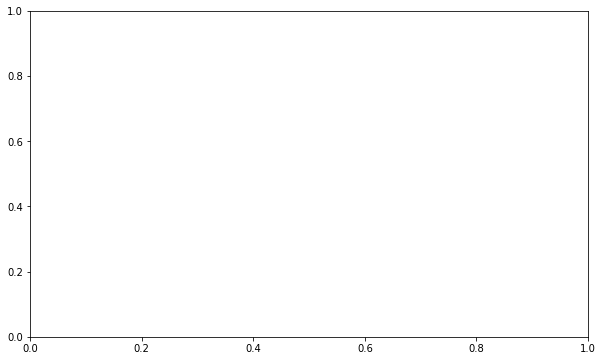

In [121]:
forest_importances = pd.read_csv("./graphs/Braak/SVM_T4_sigmoid_amy_3_segsouscort_perm_feature.csv", index_col=0)

fig, ax = plt.subplots(figsize=(10, 6))

forest_importances["Permutation Importance"].plot.bar(yerr=forest_importances["std"], ax=ax)
ax.set_title("Top 5 Feature Permutation")
ax.set_ylabel("Mean score decrease")
fig.tight_layout()
print("saving feature permutation in " + final_path)
plt.savefig(final_path + "/feature_permutation_" + stratml + "_" + k + "_" + options + ".png")
if v:
    plt.show()
plt.clf()

['without_fs']
[0.7639036251105217]
[0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 0]
roc with micro: 0.7639036251105217
f1 with micro: 0.24583333333333335
f1 with micro: 0.5172413793103449
f1 with micro: 0.41724137931034483
Micro-averaged One-vs-Rest ROC AUC score:
0.79
Macro-averaged One-vs-Rest ROC AUC score:
0.64
[0 3 3 2 2 3 0 0 2 3 3 0 1 0 0 1 0 0 0 0 0 0 0 3 1 3 0 3 3]
[0 3 3 0 0 2 0 0 0 0 3 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 3 3 0]
f1 with macro: 0.3
f1 with micro: 0.5172413793103449
f1 with weighted: 0.4807881773399015


SystemExit: 

c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 720x576 with 0 Axes>

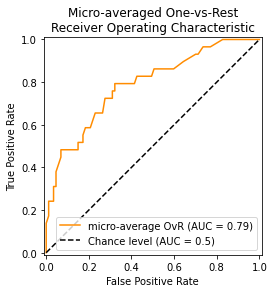

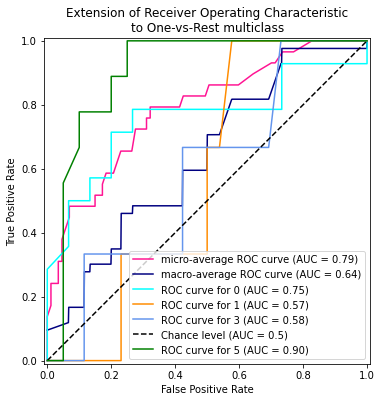

In [142]:
### RESET IMAGES
add_path = [["without_fs"], ["with_fs", "T0"], ["with_fs", "T1"], ["with_fs", "T2"], ["with_fs", "T3"], ["with_fs", "T4"]]

path = "./backup_models/Braak/brut class imbalance/"

ml_strat = [["RF", ["10", "100", "1000"]], ["SVM", ["linear", "poly", "rbf", "sigmoid"]]]
dbs = ["amy_2_ba_exvivo", "amy_2_destrieux", "amy_2_dkt", "amy_2_wmparc", "amy_2_segsouscort", "amy_2_desikan", 
       "amy_3_ba_exvivo", "amy_3_destrieux", "amy_3_dkt", "amy_3_wmparc", "amy_3_segsouscort", "amy_3_desikan"]

for ml in ml_strat:
    algo = ml[0]
    stratml = ml[1]
    k = "depth" if algo == "RF" else "kernel"
    for suite_path in add_path:
        print(suite_path)
        p = path +algo+"/"+"/".join(suite_path)+"/auc_roc"
        dir_grid = max([datetime.strptime(f, "%d-%m-%Y_%Hh%Mm%Ss") for f in os.listdir(p) if 
                            os.path.isdir(p + '/' + f)]).strftime("%d-%m-%Y_%Hh%Mm%Ss")
        p = p+"/"+dir_grid+'/'
        strat_df_score_cross_val = pd.DataFrame(columns=stratml, index=dbs)
        target_names = [0,1,3,5]
        for stratdb in dbs:
            strat_df_score_cross_val = pd.DataFrame(columns=["auc_roc_macro", "auc_roc_micro", "f1score"], index=dbs)
            for k_val in stratml:
                with open(p+"gridsearch_models/"+k+"_"+k_val+"_"+stratdb+"_score_auc_roc.pickle", 'rb') as f:
                    grid = pickle.load(f)
                model = grid.best_estimator_
                df = pd.read_csv(p+"dataset/"+stratdb+".csv")
                g = df["id_patient"]
                y = df["diagnostic"]
                X = df.drop(columns={"id_patient", "diagnostic"})
                y_bin = label_binarize(y, classes=[0,1,3,5])

                # Préparer la validation croisée
                sgkf = StratifiedGroupKFold(n_splits=3)

                # Initialiser les variables pour les courbes ROC et les matrices de confusion
                tprs = []
                aucs = []
                mean_fpr = np.linspace(0, 1, 100)
                confusion_matrices = np.zeros((4, 4))
                scores = []

                plt.figure(figsize=(10, 8))

                for train_index, test_index in sgkf.split(X, y, g):
                    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                    y_train, y_test = y_bin[train_index], y_bin[test_index]

                    # Entraîner le modèle OVR avec le modèle spécifié
                    classifier = OneVsRestClassifier(model)
                    classifier.fit(X_train, y_train)
                    model.fit(X_train, y_train)

                    # Vérifier si le modèle a la méthode `decision_function`, sinon utiliser `predict_proba`
                    if hasattr(classifier, "decision_function"):
                        y_score = classifier.decision_function(X_test)
                    else:
                        y_score = classifier.predict_proba(X_test)
                    scores.append(roc_auc_score(y_test, y_score, multi_class="ovo", average="weighted", labels=labels))
                    print(scores)
                    y_predicted_here = model.predict(X_test)
                    y_predicted_here = np.argmax(y_predicted_here, axis=1)
                    y_predicted_here[y_predicted_here == 3] = 5
                    y_predicted_here[y_predicted_here == 2] = 3
                    print(y_predicted_here)
                    print("roc with micro: "+str(roc_auc_score(y_test, y_score, multi_class="ovr", average="weighted", labels=labels)))
                    print("f1 with micro: "+str(f1_score(y.iloc[test_index], y_predicted_here, average="macro")))
                    print("f1 with micro: "+str(f1_score(y.iloc[test_index], y_predicted_here, average="micro")))
                    print("f1 with micro: "+str(f1_score(y.iloc[test_index], y_predicted_here, average="weighted")))
                    from sklearn.metrics import RocCurveDisplay

                    
                    
                    
                    display = RocCurveDisplay.from_predictions(
                        y_test.ravel(),
                        y_score.ravel(),
                        name="micro-average OvR",
                        color="darkorange",
                        plot_chance_level=True,
                    )
                    _ = display.ax_.set(
                        xlabel="False Positive Rate",
                        ylabel="True Positive Rate",
                        title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
                    )
                    ######################## micro
                    from sklearn.metrics import auc, roc_curve

                    # store the fpr, tpr, and roc_auc for all averaging strategies
                    fpr, tpr, roc_auc = dict(), dict(), dict()
                    # Compute micro-average ROC curve and ROC area
                    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
                    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

                    print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
                    ###################### macro
                    for i in range(n_classes):
                        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
                        roc_auc[i] = auc(fpr[i], tpr[i])

                    fpr_grid = np.linspace(0.0, 1.0, 1000)

                    # Interpolate all ROC curves at these points
                    mean_tpr = np.zeros_like(fpr_grid)

                    for i in range(n_classes):
                        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

                    # Average it and compute AUC
                    mean_tpr /= n_classes

                    fpr["macro"] = fpr_grid
                    tpr["macro"] = mean_tpr
                    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

                    print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")
                    
                    
                    from itertools import cycle

                    fig, ax = plt.subplots(figsize=(6, 6))

                    plt.plot(
                        fpr["micro"],
                        tpr["micro"],
                        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
                        color="deeppink"
                    )

                    plt.plot(
                        fpr["macro"],
                        tpr["macro"],
                        label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
                        color="navy"
                    )

                    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
                    for class_id, color in zip(range(4), colors):
                        RocCurveDisplay.from_predictions(
                            y_test[:, class_id],
                            y_score[:, class_id],
                            name=f"ROC curve for {target_names[class_id]}",
                            color=color,
                            ax=ax,
                            plot_chance_level=(class_id == 2),
                        )

                    _ = ax.set(
                        xlabel="False Positive Rate",
                        ylabel="True Positive Rate",
                        title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
                    )
                    
                    # Convertir les prédictions binaires en étiquettes multiclasses
                    y_pred_labels = np.argmax(y_score, axis=1)
                    y_test_labels = np.argmax(y_test, axis=1)
                    
                    print(y_test_labels)
                    print(y_pred_labels)
                    
                    print("f1 with macro: "+str(f1_score(y_test_labels, y_pred_labels, average="macro")))
                    print("f1 with micro: "+str(f1_score(y_test_labels, y_pred_labels, average="micro")))
                    print("f1 with weighted: "+str(f1_score(y_test_labels, y_pred_labels, average="weighted")))
                    # Accumuler les matrices de confusion
                    confusion_matrices += confusion_matrix(y_test_labels, y_pred_labels, labels=target_names)
                    sys.exit()
                
                cm = sum(confusion_matrices)
                print(cm)
                if summat:
                    ConfusionMatrixDisplay(cm, display_labels=classes).plot()
                else:

                    # Calcul de la somme des éléments de chaque ligne
                    row_sums = np.sum(cm, axis=1)

                    # Mise à l'échelle en divisant chaque élément par la somme de sa ligne
                    scaled_arr = cm / row_sums[:, np.newaxis]
                    # cm = ConfusionMatrixDisplay(sum_conf_mat / np.sum(sum_conf_mat), display_labels=classes).plot()
                    ConfusionMatrixDisplay(scaled_arr, display_labels=model.classes_).plot()
                    
                plt.savefig("./graphs/Braak/RESET"+algo+"_"+str(i)+"_"+p.split("/")[-3]+"_"+ str(top_scores[i][2])+"_"+top_scores[i][3]+"_cm.png")
                plt.show()
                plt.clf()

                # Afficher la matrice de confusion moyenne
                print("Matrice de confusion cumulée:\n", confusion_matrices)
                sys.exit()


In [ ]:
import lime
import lime.lime_tabular

if target == "Braak":
    index = "id_patient"
else:
    index = "RID"
    
summat = True
for algo in top_scores_algo:
    top_scores = top_scores_algo[algo]
    k = "depth" if algo =="RF" else "kernel"
    
    for i in range(1):
        print(top_scores[i])
        filename = top_scores[i][1]
        print(filename)
        path = "/".join(filename.split("/")[:-1])
        strat_db = top_scores[i][3]
        k_val = top_scores[i][2]
        best_scores=top_scores[i][0]

        with open(path+"/gridsearch_models/"+k+"_"+k_val+"_"+strat_db+"_score_f1score.pickle", 'rb') as f:
            grid = pickle.load(f)
        df  = pd.read_csv(path+"/dataset/"+strat_db+".csv", index_col=0)
        y = df[["diagnostic"]]
        g = df[index]
        X = df.drop(columns={index, "diagnostic"})
        model = grid.best_estimator_
        if algo == "SVM":
            params = grid.best_params_
            params["probability"] = True
            #model = model(**params)
        
        sgkf = StratifiedGroupKFold(n_splits=3)

        for train_index, test_index in sgkf.split(X, y, g):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            # LIME has one explainer for all the models
            explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                               feature_names=X_train.columns.values.tolist(),
                                                               class_names=[0, 1, 3, 5], verbose=True, mode='classification')
            
            
            for lab in [0,1,3,5]:
                j= -1
                for ind in range(len(y_pred)):
                    if y_pred[ind] == lab and y_pred[ind] == y_test.values.ravel()[ind]:
                        j = ind 
                        break
                print(j)
                print(lab)
                ind_data = ind
                if j != -1:
                    ind_data = list(y_test.index)[ind]
                    #print(X_test.iloc[ind_data, :])
                    if lab == 3:
                        lab = 2
                    if lab == 5: 
                        lab = 3
                    if lab == 1:
                        exp = explainer.explain_instance(X_test.iloc[j], model.predict_proba, num_features=5, labels=[0, lab])

                    else:
                        exp = explainer.explain_instance(X_test.iloc[j], model.predict_proba, num_features=5, labels=[lab])

                    exp.show_in_notebook(labels = [lab], show_table=True)
                    pd.DataFrame(exp.as_list(label=lab),columns=['Feature','Contribution']).to_csv(
                        './graphs/Braak/Lime/'+algo+'/lime_report_class'+str(y_pred[j])+'_index_'+str(ind_data)+'.csv')
                    exp.save_to_file('./graphs/Braak/Lime/'+algo+'/lime_report_class'+str(y_pred[j])+'_index_'+str(ind_data)+'.html')
                    fig = exp.as_pyplot_figure(label = lab)

                    fig.savefig('./graphs/Braak/Lime/'+algo+'/lime_report_class'+str(y_pred[j])+'_index_'+str(ind_data)+'.jpg',bbox_inches='tight')
                    
                    if lab == 1:
                        print("just to check")
                        fig = exp.as_pyplot_figure(label = 0)
                        display(pd.DataFrame(exp.as_list(label=0),columns=['Feature','Contribution']))
                        exp.show_in_notebook(labels=[0], show_table=True)
                    
                    """
                    plt.savefig("./graphs/Braak/lime_for_class_"+str(y_pred[j])+"_"+algo+"_index_"+str(ind_data)+".jpg")
                    plt.clf()"""
            break

In [17]:
top_scores_algo

{'RF': [(0.6576085936767051,
   './backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv',
   '1000',
   'amy_2_wmparc'),
  (0.6564546392719767,
   './backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv',
   '10',
   'amy_2_wmparc'),
  (0.6519986818256713,
   './backup_models/Braak/RF/with_fs/T1/f1score/26-05-2024_16h29m53s/depth_score_on_cross_val.csv',
   '100',
   'amy_2_wmparc'),
  (0.6512256524713271,
   './backup_models/Braak/RF/with_fs/T1/f1score/26-05-2024_16h29m53s/depth_score_on_cross_val.csv',
   '100',
   'amy_2_destrieux'),
  (0.6416431400405175,
   './backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv',
   '10',
   'amy_3_ba_exvivo'),
  (0.6411582283099311,
   './backup_models/Braak/RF/with_fs/T2/f1score/26-05-2024_16h46m25s/depth_score_on_cross_val.csv',
   '1000',
   'amy_3_dkt'),
  (0.6400503034067049,
   './backup_models/Braak/RF/with_fs/T2/f1score/26

In [69]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for algo in top_scores_algo:
    top1 = top_scores_algo[algo][0]
    
    score = top1[0]
    path_file = top1[1]
    ml_param = top1[2]
    db_param = top1[3]
    p = "/".join(path_file.split("/")[:-1])
    k = "depth" if algo == "RF" else "kernel"
    
    if os.path.exists(p):
        
        df  = pd.read_csv(p+"/dataset/"+db_param+".csv", index_col=0)
        g = df[["id_patient"]]
        display(df)
        y = df["diagnostic"]
        X = df.drop(columns=["diagnostic", "id_patient"])
        with open(p+"/gridsearch_models/"+k+"_"+ml_param+"_"+db_param+"_score_f1score.pickle", 'rb') as f:
            grid = pickle.load(f)
        model =grid.best_estimator_
        
        # Préparer la validation croisée
        sgkf = StratifiedGroupKFold(n_splits=3)
        scores_avg = {}
        df_scores = []
        for train_index, test_index in sgkf.split(X, y, g):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            
            y_pred = model.predict(X_test)
            
            scores = classification_report(y_test, y_pred, labels=[0,1,3,5], output_dict=True)
            df_for_scoring = pd.DataFrame(scores).transpose()
            
            new_line = [0]*(len(df_for_scoring.index)-2)
            score_auc = roc_auc_score(y_test, model.predict_proba(X_test), average="macro", multi_class='ovr', labels=[0,1,3,5])
            new_line.append(score_auc)
            score_auc = roc_auc_score(y_test, model.predict_proba(X_test), average="weighted", multi_class='ovr', labels=[0,1,3,5])
            new_line.append(score_auc)
            df_for_scoring["auc"] = new_line
            
            df_scores.append(df_for_scoring)
        # Calculer la moyenne de chaque élément
        mean_df = pd.concat(df_scores).groupby(level=0).mean().round(3)

        # Calculer l'écart type de chaque élément
        std_df = pd.concat(df_scores).groupby(level=0).std().round(3)

        # Afficher la moyenne
        print("Moyenne de chaque élément :\n")
        display(mean_df)

        # Afficher l'écart type
        print("\nÉcart type de chaque élément :\n")
        display(std_df)
                        
                        
        

,id_patient,z_neuro_cerad_figure_copy_z,drawing_neuro_clock,copy_neuro_clock,drawing_neuro_clock_z,copy_neuro_clock_z,memory_neuro_composite,executive_neuro_composite,language_neuro_composite,visuospatial_neuro_composite,...,wm_rh_rostralmiddlefrontal_irm_wmparc_v720_vol,wm_rh_superiorfrontal_irm_wmparc_v720_vol,wm_rh_superiorparietal_irm_wmparc_v720_vol,wm_rh_frontalpole_irm_wmparc_v720_vol,wm_rh_insula_irm_wmparc_v720_vol,left_unsegmentedwhitematter_irm_wmparc_v720_vol,right_unsegmentedwhitematter_irm_wmparc_v720_vol,amy_2_neg,amy_2_pos,diagnostic
0,1,-0.140299,0.375274,-0.968040,0.368879,-0.968719,0.664972,0.120031,0.048232,-0.298525,...,0.958457,-0.271572,0.397970,0.186067,0.010523,0.239271,0.046882,0.0,1.0,0
1,3,-0.140299,0.375274,-0.175169,0.368879,-0.172082,0.057977,0.340274,-0.922572,-0.014659,...,0.259112,0.497040,-0.115965,-1.413094,-0.228949,0.616200,0.931032,1.0,0.0,0
2,5,0.710854,-0.257541,-0.175169,-0.266558,-0.172082,0.222733,-0.339606,-0.040023,0.227462,...,-0.749404,-0.560217,-1.105632,-0.752902,-0.637986,-0.201622,-0.516751,1.0,0.0,3
3,6,0.710854,0.375274,-0.175169,0.368879,-0.172082,-0.085100,0.570092,0.411058,0.444536,...,-1.450047,-0.637222,-0.793075,-0.755436,-0.421558,-0.799240,-1.084259,1.0,0.0,0
4,11,0.710854,0.375274,-0.175169,0.368879,-0.172082,-0.713773,0.665850,-0.010604,0.444536,...,-0.013523,1.439120,0.212689,-0.227029,0.686032,0.430503,0.453518,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1355,-0.140299,-0.257541,-0.968040,-0.266558,-0.968719,-1.156012,-0.167242,0.214936,-0.515599,...,0.403450,0.131897,-0.783524,0.953968,-0.478653,-0.550726,-0.833200,0.0,1.0,5
82,1358,-0.986295,-0.257541,-0.175169,-0.266558,-0.172082,-0.878529,-0.818394,-1.589386,-0.682580,...,0.125762,1.289445,0.440038,-0.482996,-0.257496,-0.231126,-0.225974,0.0,1.0,5
83,1363,-2.678285,-3.421616,-3.346653,-3.403526,-3.350970,-1.411817,-2.206879,-1.540356,-3.838503,...,-0.642298,-0.276221,-1.325844,-1.371278,1.124391,-0.475148,-0.865248,0.0,1.0,5
84,1365,0.710854,0.375274,-0.175169,0.368879,-0.172082,-0.362583,0.340274,-0.118471,0.444536,...,1.311120,0.640463,1.100352,0.069488,1.523109,0.329555,0.683556,1.0,0.0,0


Moyenne de chaque élément :



c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,precision,recall,f1-score,support,auc
0,0.681,0.881,0.766,14.000,0.000
1,0.111,0.111,0.111,2.667,0.000
3,0.417,0.194,0.229,3.667,0.000
5,0.522,0.440,0.469,8.333,0.000
accuracy,0.593,0.593,0.593,0.593,0.000
macro avg,0.433,0.407,0.394,28.667,0.687
weighted avg,0.552,0.593,0.551,28.667,0.736



Écart type de chaque élément :



,precision,recall,f1-score,support,auc
0,0.096,0.041,0.070,0.000,0.000
1,0.192,0.192,0.192,0.577,0.000
3,0.520,0.173,0.206,0.577,0.000
5,0.135,0.063,0.056,0.577,0.000
accuracy,0.037,0.037,0.037,0.037,0.000
macro avg,0.132,0.074,0.088,0.577,0.036
weighted avg,0.077,0.037,0.058,0.577,0.009


,id_patient,z_neuro_cerad_figure_copy_z,drawing_neuro_clock,copy_neuro_clock,drawing_neuro_clock_z,copy_neuro_clock_z,memory_neuro_composite,executive_neuro_composite,language_neuro_composite,visuospatial_neuro_composite,...,wm_rh_parsorbitalis_irm_wmparc_v720_vol,wm_rh_rostralmiddlefrontal_irm_wmparc_v720_vol,wm_rh_superiorfrontal_irm_wmparc_v720_vol,wm_rh_superiorparietal_irm_wmparc_v720_vol,wm_rh_frontalpole_irm_wmparc_v720_vol,wm_rh_insula_irm_wmparc_v720_vol,right_unsegmentedwhitematter_irm_wmparc_v720_vol,amy_2_neg,amy_2_pos,diagnostic
0,1,-0.140299,0.375274,-0.968040,0.368879,-0.968719,0.664972,0.120031,0.048232,-0.298525,...,1.003245,0.958457,-0.271572,0.397970,0.186067,0.010523,0.046882,0.0,1.0,0
1,3,-0.140299,0.375274,-0.175169,0.368879,-0.172082,0.057977,0.340274,-0.922572,-0.014659,...,0.672620,0.259112,0.497040,-0.115965,-1.413094,-0.228949,0.931032,1.0,0.0,0
2,5,0.710854,-0.257541,-0.175169,-0.266558,-0.172082,0.222733,-0.339606,-0.040023,0.227462,...,-0.430853,-0.749404,-0.560217,-1.105632,-0.752902,-0.637986,-0.516751,1.0,0.0,3
3,6,0.710854,0.375274,-0.175169,0.368879,-0.172082,-0.085100,0.570092,0.411058,0.444536,...,-1.476862,-1.450047,-0.637222,-0.793075,-0.755436,-0.421558,-1.084259,1.0,0.0,0
4,11,0.710854,0.375274,-0.175169,0.368879,-0.172082,-0.713773,0.665850,-0.010604,0.444536,...,0.155445,-0.013523,1.439120,0.212689,-0.227029,0.686032,0.453518,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1355,-0.140299,-0.257541,-0.968040,-0.266558,-0.968719,-1.156012,-0.167242,0.214936,-0.515599,...,-0.259294,0.403450,0.131897,-0.783524,0.953968,-0.478653,-0.833200,0.0,1.0,5
82,1358,-0.986295,-0.257541,-0.175169,-0.266558,-0.172082,-0.878529,-0.818394,-1.589386,-0.682580,...,0.028441,0.125762,1.289445,0.440038,-0.482996,-0.257496,-0.225974,0.0,1.0,5
83,1363,-2.678285,-3.421616,-3.346653,-3.403526,-3.350970,-1.411817,-2.206879,-1.540356,-3.838503,...,-0.648633,-0.642298,-0.276221,-1.325844,-1.371278,1.124391,-0.865248,0.0,1.0,5
84,1365,0.710854,0.375274,-0.175169,0.368879,-0.172082,-0.362583,0.340274,-0.118471,0.444536,...,0.890399,1.311120,0.640463,1.100352,0.069488,1.523109,0.683556,1.0,0.0,0


c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Moyenne de chaque élément :



,precision,recall,f1-score,support,auc
0,0.683,0.810,0.739,14.000,0.000
1,0.111,0.111,0.111,2.667,0.000
3,0.617,0.611,0.606,3.667,0.000
5,0.757,0.560,0.630,8.333,0.000
accuracy,0.652,0.652,0.652,0.652,0.000
macro avg,0.542,0.523,0.521,28.667,0.715
weighted avg,0.643,0.652,0.635,28.667,0.735



Écart type de chaque élément :



,precision,recall,f1-score,support,auc
0,0.061,0.082,0.056,0.000,0.000
1,0.192,0.192,0.192,0.577,0.000
3,0.126,0.241,0.183,0.577,0.000
5,0.225,0.063,0.064,0.577,0.000
accuracy,0.064,0.064,0.064,0.064,0.000
macro avg,0.046,0.037,0.023,0.577,0.067
weighted avg,0.055,0.064,0.052,0.577,0.060


# Visualize data

In [ ]:
for algo, time in [["RF", "22-05-2024_19h50m19s"], ["SVM", ""]]:
    p = "./backup_models/Braak/"+algo+"/without_fs/f1score/"+time+

In [59]:
import pandas as pd

# Liste de DataFrames d'exemple
df1 = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}, index=['X', 'Y', 'Z'])

df2 = pd.DataFrame({
    'A': [10, 11, 12],
    'B': [13, 14, 15],
    'C': [16, 17, 18]
}, index=['X', 'Y', 'Z'])

df3 = pd.DataFrame({
    'A': [19, 20, 21],
    'B': [22, 23, 24],
    'C': [25, 26, 27]
}, index=['X', 'Y', 'Z'])

# Liste de DataFrames
list_of_dataframes = [df1, df2, df3]
test = pd.concat(list_of_dataframes)
display(test)
display(test.groupby(level=0).mean())

sys.exit()
display(test)
# Calculer la moyenne de chaque élément
mean_df = pd.concat(list_of_dataframes).groupby(level=0).mean()

# Calculer l'écart type de chaque élément
std_df = pd.concat(list_of_dataframes).groupby(level=0).std()

# Afficher la moyenne
print("Moyenne de chaque élément :\n", mean_df)

# Afficher l'écart type
print("\nÉcart type de chaque élément :\n", std_df)


,A,B,C
X,1,4,7
Y,2,5,8
Z,3,6,9
X,10,13,16
Y,11,14,17
Z,12,15,18
X,19,22,25
Y,20,23,26
Z,21,24,27


,A,B,C
X,10.0,13.0,16.0
Y,11.0,14.0,17.0
Z,12.0,15.0,18.0


SystemExit: 

c:\users\celia\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3259: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# RUNTIME

In [24]:
import time
import timeit


if target == "Braak":
    index = "id_patient"
else:
    index = "RID"
for algo in top_scores_algo:
    top_scores = top_scores_algo[algo]
    k = "depth" if algo =="RF" else "kernel"
    
    for i in range(1):
        print(top_scores[i])
        filename = top_scores[i][1]
        print(filename)
        path = "/".join(filename.split("/")[:-1])
        strat_db = top_scores[i][3]
        k_val = top_scores[i][2]
        best_scores=top_scores[i][0]

        with open(path+"/gridsearch_models/"+k+"_"+k_val+"_"+strat_db+"_score_f1score.pickle", 'rb') as f:
            grid = pickle.load(f)
        df  = pd.read_csv(path+"/dataset/"+strat_db+".csv", index_col=0)
        y = df["diagnostic"]
        g = df[index]
        X = df.drop(columns={index, "diagnostic"})
        model = grid.best_estimator_
        
        tot_time = []
        for i in range(5):
            start_x = time.time()
            cv = StratifiedGroupKFold(5)
            splitting = cv.split(X, y, g)
            for indice, (train_index, test_index) in enumerate(splitting):

                X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[
                    test_index]
                start = time.time()
                model.fit(X_train, y_train)

                model.predict(X_test)
                print("time to fit and predict: "+str(time.time() - start))

            print("cross-validation end at "+str( time.time() - start_x))
            tot_time.append(time.time() - start_x)
        
        print(str(round(sum(tot_time)/len(tot_time), 3))+" +- "+str(round(statistics.pstdev(tot_time), 3)))
        

(0.6576085936767051, './backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv', '1000', 'amy_2_wmparc')
./backup_models/Braak/RF/with_fs/T4/f1score/26-05-2024_17h17m42s/depth_score_on_cross_val.csv
time to fit and predict: 0.1434791088104248
time to fit and predict: 0.1589674949645996
time to fit and predict: 0.15265202522277832
time to fit and predict: 0.14778780937194824
time to fit and predict: 0.14160799980163574
cross-validation end at 0.791656494140625
time to fit and predict: 0.14513111114501953
time to fit and predict: 0.14925789833068848
time to fit and predict: 0.14639735221862793
time to fit and predict: 0.1337141990661621
time to fit and predict: 0.1564476490020752
cross-validation end at 0.7728979587554932
time to fit and predict: 0.14102959632873535
time to fit and predict: 0.14670109748840332
time to fit and predict: 0.13535094261169434
time to fit and predict: 0.1446397304534912
time to fit and predict: 0.13962531089782715
cross-val